<a href="https://colab.research.google.com/github/VireshAmbardar/CarSales_project/blob/main/Sentimeantal_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
from google.colab import drive
drive.mount('/content/gdive')


Drive already mounted at /content/gdive; to attempt to forcibly remount, call drive.mount("/content/gdive", force_remount=True).


In [185]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [186]:
df = pd.read_excel('/content/gdive/MyDrive/NLTK/Data_Analytics_Kavida.xlsx')
df.head()

,Supplier/Company,news_title,snippet,Kavida_category,Relevant (Yes/No),Risk_Category,signal_sentiment
0,Company 1,Airbus A380 To Test CFM’s Open-Fan Architectur...,The general consensus of the aviation industr...,Compliance,NaN,Environmental Impact,Negative
1,Company 2,"Los Angeles Capital Management LLC Has $893,00...",Los Angeles Capital Management LLC increased ...,Supplier Market,NaN,Financial Changes,Negative
2,Company 3,Morningstar Investment Service - GuruFocus.com,Morningstar Investment Services LLC recently ...,Supplier Market,NaN,Financial Changes,Positive
3,Company 4,"Nelson Peltz Buys 3, Sells 2 i - GuruFocus.com",Nelson Peltz recently filed their 13F report ...,Supplier Market,NaN,Financial Changes,Positive
4,Company 5,Parker-Hannifin Co. (NYSE:PH) Sees Large Decre...,Parker-Hannifin Co. (NYSE:PH - Get Rating) wa...,Compliance,NaN,NaN,Negative


In [187]:
df.columns

Index(['Supplier/Company', 'news_title', 'snippet', 'Kavida_category',
       'Relevant (Yes/No)', 'Risk_Category', 'signal_sentiment'],
      dtype='object')

In [188]:
df.drop(['Supplier/Company','news_title','Kavida_category','Relevant (Yes/No)','Risk_Category'], axis=1,inplace=True)
df.head()

,snippet,signal_sentiment
0,The general consensus of the aviation industr...,Negative
1,Los Angeles Capital Management LLC increased ...,Negative
2,Morningstar Investment Services LLC recently ...,Positive
3,Nelson Peltz recently filed their 13F report ...,Positive
4,Parker-Hannifin Co. (NYSE:PH - Get Rating) wa...,Negative


In [189]:
df['signal_sentiment'] = np.where(df['signal_sentiment']=='Positive',1,0)
df.head()

,snippet,signal_sentiment
0,The general consensus of the aviation industr...,0
1,Los Angeles Capital Management LLC increased ...,0
2,Morningstar Investment Services LLC recently ...,1
3,Nelson Peltz recently filed their 13F report ...,1
4,Parker-Hannifin Co. (NYSE:PH - Get Rating) wa...,0


In [190]:
df = df.apply(lambda x: x.str.lower() if x.dtype=='object' else x)
df.head()

,snippet,signal_sentiment
0,the general consensus of the aviation industr...,0
1,los angeles capital management llc increased ...,0
2,morningstar investment services llc recently ...,1
3,nelson peltz recently filed their 13f report ...,1
4,parker-hannifin co. (nyse:ph - get rating) wa...,0


In [191]:
#  tokanizer
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [192]:
import nltk

#import stopWords
from nltk.corpus import stopwords


#import textblob
from textblob import Word , TextBlob

In [193]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [194]:
def cleaning(sentiment , stop_words):
  pre_processed_sentiments = sentiment
  pre_processed_sentiments.replace('[^\w\s]','')

  pre_processed_sentiments = " ".join(word for word in sentiment.split() if word not in stop_words)
  pre_processed_sentiments = " ".join(Word(word).lemmatize() for word in sentiment.split())

  return(pre_processed_sentiments)

df['pre_processed_sentiments'] = df['snippet'].apply(lambda x: cleaning(x ,stop_words))

In [195]:
df.head()

,snippet,signal_sentiment,pre_processed_sentiments
0,the general consensus of the aviation industr...,0,the general consensus of the aviation industry...
1,los angeles capital management llc increased ...,0,los angeles capital management llc increased i...
2,morningstar investment services llc recently ...,1,morningstar investment service llc recently fi...
3,nelson peltz recently filed their 13f report ...,1,nelson peltz recently filed their 13f report f...
4,parker-hannifin co. (nyse:ph - get rating) wa...,0,parker-hannifin co. (nyse:ph - get rating) wa ...


In [196]:
df.drop(['snippet'], axis=1,inplace=True)
df.head()

,signal_sentiment,pre_processed_sentiments
0,0,the general consensus of the aviation industry...
1,0,los angeles capital management llc increased i...
2,1,morningstar investment service llc recently fi...
3,1,nelson peltz recently filed their 13f report f...
4,0,parker-hannifin co. (nyse:ph - get rating) wa ...


In [197]:
x = df["pre_processed_sentiments"]
y = df["signal_sentiment"]

In [198]:
x

0     the general consensus of the aviation industry...
1     los angeles capital management llc increased i...
2     morningstar investment service llc recently fi...
3     nelson peltz recently filed their 13f report f...
4     parker-hannifin co. (nyse:ph - get rating) wa ...
5     the project in xinjiang is designed to reduce ...
6     the first nuclear ship named for an african am...
7     the malaysian government ha been hit by a seri...
8     meggitt plc (lon:mggt – get rating) insider to...
9     a suv crashed into a power pole and rolled int...
10    electronic art ha partnered with marvel entert...
11    germany’s energy network regulator say the cou...
12    general electric thrives on strong performance...
13    philip ha a long runway of mid-single-digit gr...
14    scotia capital inc. cut it holding in share of...
15    avalon global asset management llc recently fi...
16    crawford investment counsel inc. recently file...
17    in accordance with applicable regulations,

In [199]:
from keras.preprocessing.text import Tokenizer

In [200]:
Tokenizer = Tokenizer(num_words=400,oov_token="<OOV>")
Tokenizer.fit_on_texts(list(x))

In [201]:
Tokenizer

In [202]:
words=Tokenizer.word_index
print(words)

{'<OOV>': 1, 'the': 2, 'of': 3, 'a': 4, 'in': 5, 'to': 6, 'and': 7, 'it': 8, 'ha': 9, 'share': 10, 'for': 11, 'on': 12, 'company': 13, 'at': 14, 'wa': 15, 'quarter': 16, 'stock': 17, 'is': 18, 'by': 19, 'general': 20, 'be': 21, 'year': 22, 'with': 23, 'their': 24, 'which': 25, 'get': 26, 'an': 27, 'report': 28, '2022': 29, 'electric': 30, '000': 31, 'recently': 32, 'end': 33, 'supply': 34, 'trading': 35, 'management': 36, 'rating': 37, 'filed': 38, '13f': 39, 'second': 40, 'were': 41, 'equity': 42, 'portfolio': 43, '1': 44, 'day': 45, 'government': 46, 'that': 47, 'fut': 48, 'this': 49, 'philip': 50, 'information': 51, 'iifl': 52, 'best': 53, 'energy': 54, 'product': 55, 'llc': 56, 'nyse': 57, 'ge': 58, '–': 59, 'owned': 60, '9': 61, 'after': 62, 'during': 63, 'bought': 64, 'investment': 65, 'detail': 66, 'guru’s': 67, 'inc': 68, 'parker': 69, 'hannifin': 70, 'co': 71, 'ph': 72, 'july': 73, 'from': 74, 'emission': 75, 'around': 76, 'into': 77, 's': 78, 'been': 79, 'scandal': 80, 'over'

In [203]:
x = Tokenizer.texts_to_sequences(x) 
x

[[2,
  20,
  197,
  3,
  2,
  198,
  199,
  18,
  4,
  200,
  6,
  95,
  54,
  7,
  96,
  201,
  3,
  97,
  98,
  2,
  202,
  5,
  97,
  203,
  9,
  204,
  13,
  205,
  20,
  30,
  6,
  206,
  12,
  24,
  207,
  55,
  6,
  21,
  96,
  208,
  7,
  209,
  210,
  99,
  8,
  211,
  21,
  212,
  11,
  213,
  5,
  214,
  5,
  2,
  215,
  216,
  217,
  11,
  95,
  218,
  219,
  25,
  15,
  220,
  5,
  100],
 [221,
  222,
  101,
  36,
  56,
  223,
  8,
  224,
  5,
  20,
  30,
  57,
  58,
  59,
  26,
  37,
  19,
  225,
  102,
  5,
  2,
  103,
  16,
  2,
  104,
  60,
  61,
  226,
  10,
  3,
  2,
  227,
  17,
  62,
  228,
  27,
  105,
  229,
  230,
  10,
  63,
  2,
  16,
  231,
  106,
  64,
  4,
  107,
  232,
  5,
  10,
  3,
  20,
  30,
  5,
  2,
  233,
  16,
  234,
  14,
  235,
  236,
  31],
 [108,
  65,
  237,
  56,
  32,
  38,
  24,
  39,
  28,
  11,
  2,
  40,
  16,
  3,
  29,
  2,
  28,
  66,
  25,
  17,
  41,
  5,
  4,
  67,
  42,
  43,
  14,
  2,
  33,
  3,
  2,
  16,
  2,
  13,
  15,
  10

In [204]:
from tensorflow import keras

from keras.preprocessing.sequence import pad_sequences

In [205]:
x = pad_sequences(x, maxlen=150, truncating='post')        # add 0 by pad_sequences

#Sipliting Data

In [206]:
from sklearn.model_selection import train_test_split

In [207]:
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size = 0.25,random_state=54)

In [208]:
from keras.models import Sequential
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten

In [209]:
model=Sequential()
model.add(Embedding(400,32,input_length=150))
model.add(LSTM(256,dropout=0.3,return_sequences=False))
model.add(Dense(1,activation='sigmoid'))

In [210]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.5)

In [211]:
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 32)           12800     
                                                                 
 lstm_3 (LSTM)               (None, 256)               295936    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 308,993
Trainable params: 308,993
Non-trainable params: 0
_________________________________________________________________


In [277]:
## Early Stopping 
import tensorflow as tf 

ear_st = tf.keras.callbacks.EarlyStopping(monitor='val_loss' ,
                                         min_delta=0.0025,
                                         patience=25,
                                         verbose=1,
                                         mode='auto',
                                         baseline=None,
                                         restore_best_weights=False)

In [278]:
hist=model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=100, batch_size=1000, verbose=1, callbacks=ear_st)

Epoch 1/100
1/1 [==============================] - 1s 550ms/step - loss: 0.9758 - accuracy: 0.8421 - val_loss: 15.7211 - val_accuracy: 0.2857
Epoch 2/100
1/1 [==============================] - 0s 484ms/step - loss: 0.3050 - accuracy: 0.9474 - val_loss: 16.6438 - val_accuracy: 0.2857
Epoch 3/100
1/1 [==============================] - 1s 525ms/step - loss: 0.5445 - accuracy: 0.8947 - val_loss: 13.6819 - val_accuracy: 0.2857
Epoch 4/100
1/1 [==============================] - 1s 503ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 14.8406 - val_accuracy: 0.2857
Epoch 5/100
1/1 [==============================] - 1s 538ms/step - loss: 1.0764 - accuracy: 0.8947 - val_loss: 16.0675 - val_accuracy: 0.2857
Epoch 6/100
1/1 [==============================] - 0s 485ms/step - loss: 0.7573 - accuracy: 0.8947 - val_loss: 12.4377 - val_accuracy: 0.2857
Epoch 7/100
1/1 [==============================] - 1s 525ms/step - loss: 0.0373 - accuracy: 0.9474 - val_loss: 11.8634 - val_accuracy: 0.4286
Epoch 

In [279]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

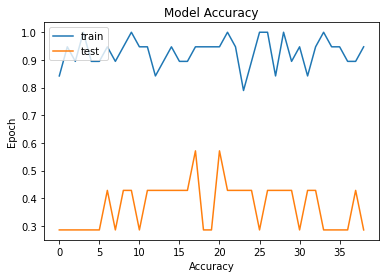

In [280]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.legend(['train','test'] , loc='upper left')
plt.show()

In [281]:
y_test_prediction = model.predict(x_test)  

In [282]:
y_test_prediction

array([[1.6880647e-05],
       [9.9999964e-01],
       [7.9279221e-07],
       [2.2213091e-13],
       [5.5462480e-02],
       [1.2671983e-12],
       [3.7196386e-01]], dtype=float32)

In [283]:
np.where(y_test_prediction>0.5,1,0)

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [284]:
y_train_prediction = model.predict(x_train) 
y_train_prediction

array([[1.0000000e+00],
       [6.7099963e-12],
       [7.1464212e-19],
       [9.9156129e-01],
       [2.8927619e-08],
       [1.0000000e+00],
       [8.4035303e-09],
       [1.4010998e-11],
       [6.5966224e-09],
       [1.0000000e+00],
       [1.2229029e-07],
       [9.9999976e-01],
       [1.7767979e-17],
       [9.8614717e-01],
       [5.4728031e-15],
       [1.9045824e-14],
       [1.0000000e+00],
       [9.9986339e-01],
       [9.9976623e-01]], dtype=float32)

In [285]:
np.where(y_test_prediction>0.5,1,0)

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [286]:
y_train_prediction = np.where(y_train_prediction>0.5,1,0 )

In [287]:
y_test_prediction = np.where(y_test_prediction>0.5,1,0 )

In [288]:
from sklearn.metrics import confusion_matrix

In [289]:
y_test.values, y_test_prediction

(array([0, 0, 0, 1, 1, 1, 1]), array([[0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0]]))

In [290]:
print('test confusion matrics')
print(confusion_matrix(y_test.values, y_test_prediction))

print("*******************************")
print('train confusion matrics')
print(confusion_matrix(y_train.values , y_train_prediction))


test confusion matrics
[[2 1]
 [4 0]]
*******************************
train confusion matrics
[[10  1]
 [ 0  8]]


In [291]:
from sklearn.metrics import classification_report

In [292]:
print('test confusion matrics')
print(classification_report(y_test.values, y_test_prediction))

print("*******************************")
print('train confusion matrics')
print(classification_report(y_train.values , y_train_prediction))


test confusion matrics
              precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.00      0.00      0.00         4

    accuracy                           0.29         7
   macro avg       0.17      0.33      0.22         7
weighted avg       0.14      0.29      0.19         7

*******************************
train confusion matrics
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.89      1.00      0.94         8

    accuracy                           0.95        19
   macro avg       0.94      0.95      0.95        19
weighted avg       0.95      0.95      0.95        19



# In test and train case we have a pretty good recall so our model is ready

In [294]:
## creating pipeline

import pickle
pickle.dump(model , open('sentemental_analysis.pkl','wb'))

#  and we have to do Tokenization and padding manually.

# Thanks